In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


In [6]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
def convert (dateStr):
    dateStr = dateStr.split('/')
    month = dateStr[0]
    return month
df['month'] = df['date'].apply(convert)

We can remove the cells having maximum number of Null values.

In [8]:
df = df.drop(['date', 'merchant_suburb', 'merchant_code', 'transaction_id'],axis = 1)

In [9]:
long_lat = df['long_lat'].str.split("-", n = 1, expand = True)
df['long'] = long_lat[0]
df['lat'] = long_lat[1]
df = df.drop(['long_lat'], axis = 1)

In [10]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,first_name,balance,gender,...,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement,month,long,lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,...,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,153.38 -27.99,debit,8,153.41,27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,...,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,151.21 -33.87,debit,8,153.41,27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,M,...,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,151.21 -33.87,debit,8,151.23,33.94
3,authorized,1.0,NaN,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,F,...,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,153.05 -26.68,debit,8,153.10,27.66
4,authorized,1.0,NaN,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,F,...,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,153.44 -28.06,debit,8,153.41,27.95


<Figure size 504x432 with 0 Axes>

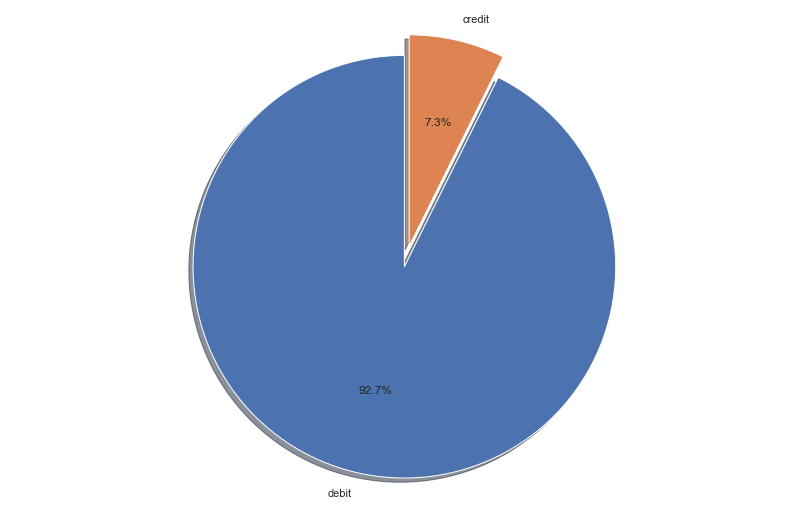

In [76]:
plt.figure(figsize = (7,6))
labels = 'debit', 'credit'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['movement'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 504x288 with 0 Axes>

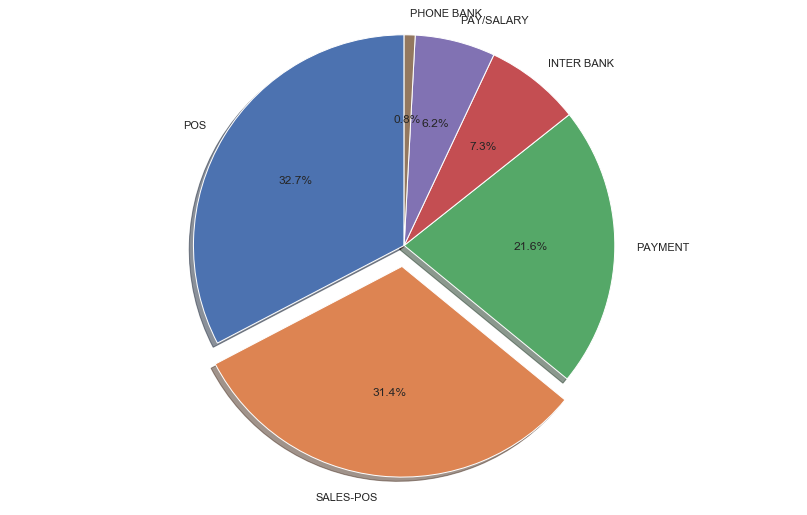

In [61]:
plt.figure(figsize = (7,4))
labels = 'POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY','PHONE BANK'
explode = (0, 0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['txn_description'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [70]:
df['month'].unique()

array(['8', '9', '10'], dtype=object)

<Figure size 504x288 with 0 Axes>

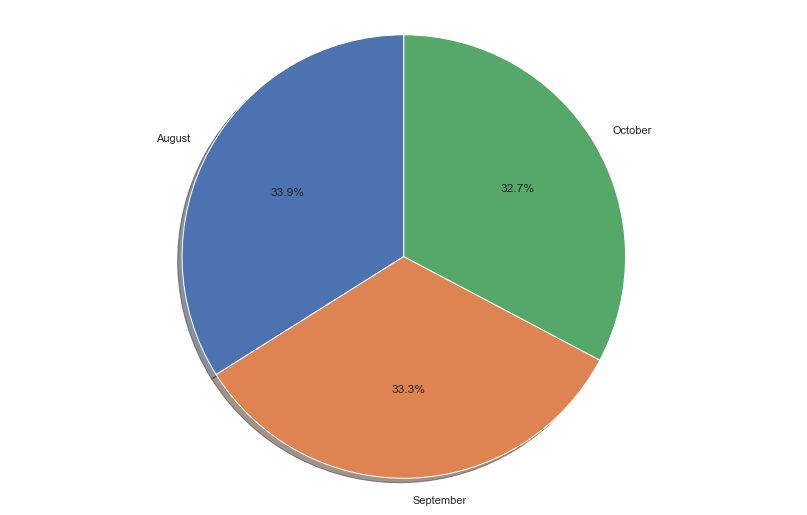

In [74]:
plt.figure(figsize = (7,4))
labels = 'August', 'September', 'October'
fig1, ax1 = plt.subplots()
ax1.pie(df['month'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 504x288 with 0 Axes>

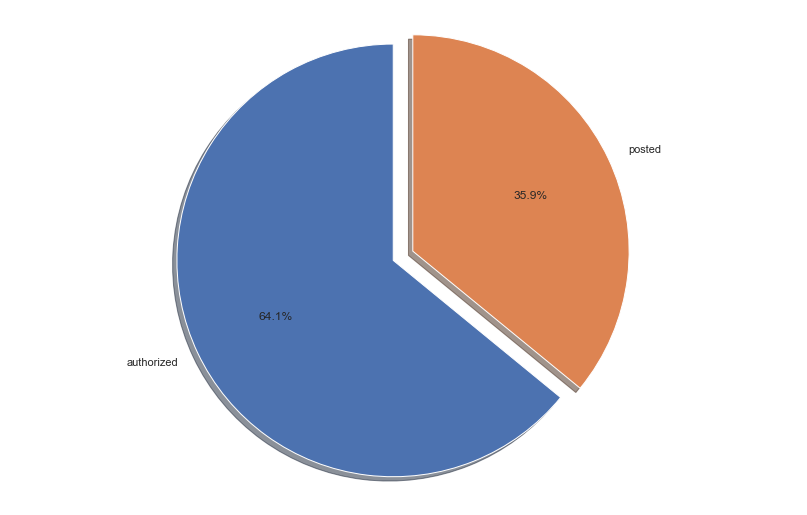

In [77]:
plt.figure(figsize = (7,4))
labels = 'authorized', 'posted'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['status'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
authorized_trncs = df[df['status'] == 'authorized']

In [14]:
authorized_trncs = authorized_trncs.drop(['merchant_state','country','merchant_long_lat','merchant_id', 'extraction','bpay_biller_code','card_present_flag', 'currency'], axis = 1)

In [15]:
authorized_trncs.head()

,status,account,txn_description,first_name,balance,gender,age,amount,customer_id,movement,month,long,lat
0,authorized,ACC-1598451071,POS,Diana,35.39,F,26,16.25,CUS-2487424745,debit,8,153.41,27.95
1,authorized,ACC-1598451071,SALES-POS,Diana,21.20,F,26,14.19,CUS-2487424745,debit,8,153.41,27.95
2,authorized,ACC-1222300524,POS,Michael,5.71,M,38,6.42,CUS-2142601169,debit,8,151.23,33.94
3,authorized,ACC-1037050564,SALES-POS,Rhonda,2117.22,F,40,40.90,CUS-1614226872,debit,8,153.10,27.66
4,authorized,ACC-1598451071,SALES-POS,Diana,17.95,F,26,3.25,CUS-2487424745,debit,8,153.41,27.95


In [16]:
authorized_trncs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 13 columns):
status             7717 non-null object
account            7717 non-null object
txn_description    7717 non-null object
first_name         7717 non-null object
balance            7717 non-null float64
gender             7717 non-null object
age                7717 non-null int64
amount             7717 non-null float64
customer_id        7717 non-null object
movement           7717 non-null object
month              7717 non-null object
long               7717 non-null object
lat                7717 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 844.0+ KB


In [17]:
authorized_trncs = authorized_trncs.reset_index(drop=True)

In [18]:
# change gender to dummy variable
authorized_trncs = pd.get_dummies(authorized_trncs, columns = ['gender'], drop_first = True)

(-4.302956947726633, 90.3025388916038, -4.208195249162886, 88.20703659692842)

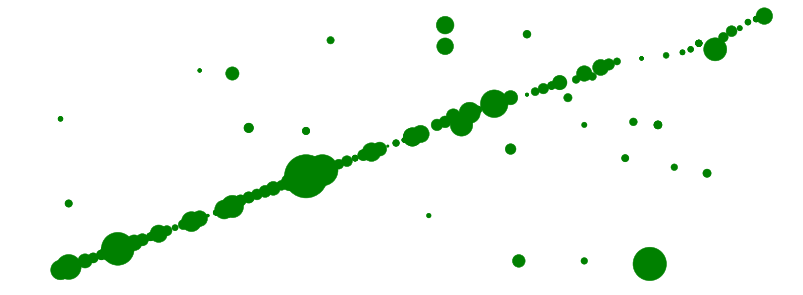

In [19]:
plt.figure(figsize = (27,10), dpi = 37)
plt.scatter(x = 'long', y = 'lat', data = authorized_trncs, s = 'amount', c = 'g')
plt.autoscale(False)
plt.axis('off')

In [20]:
authorized_trncs['txn_description'].unique()

array(['POS', 'SALES-POS'], dtype=object)

In [21]:
authorized_trncs = pd.get_dummies(authorized_trncs, columns = ['txn_description'], drop_first = True)

In [22]:
authorized_trncs.head()

,status,account,first_name,balance,age,amount,customer_id,movement,month,long,lat,gender_M,txn_description_SALES-POS
0,authorized,ACC-1598451071,Diana,35.39,26,16.25,CUS-2487424745,debit,8,153.41,27.95,0,0
1,authorized,ACC-1598451071,Diana,21.20,26,14.19,CUS-2487424745,debit,8,153.41,27.95,0,1
2,authorized,ACC-1222300524,Michael,5.71,38,6.42,CUS-2142601169,debit,8,151.23,33.94,1,0
3,authorized,ACC-1037050564,Rhonda,2117.22,40,40.90,CUS-1614226872,debit,8,153.10,27.66,0,1
4,authorized,ACC-1598451071,Diana,17.95,26,3.25,CUS-2487424745,debit,8,153.41,27.95,0,1


In [23]:
customer_df = authorized_trncs.drop(['movement', 'status'],axis = 1)

In [24]:
customer_df.head()

,account,first_name,balance,age,amount,customer_id,month,long,lat,gender_M,txn_description_SALES-POS
0,ACC-1598451071,Diana,35.39,26,16.25,CUS-2487424745,8,153.41,27.95,0,0
1,ACC-1598451071,Diana,21.20,26,14.19,CUS-2487424745,8,153.41,27.95,0,1
2,ACC-1222300524,Michael,5.71,38,6.42,CUS-2142601169,8,151.23,33.94,1,0
3,ACC-1037050564,Rhonda,2117.22,40,40.90,CUS-1614226872,8,153.10,27.66,0,1
4,ACC-1598451071,Diana,17.95,26,3.25,CUS-2487424745,8,153.41,27.95,0,1


Text(0, 0.5, 'Amount Spent')

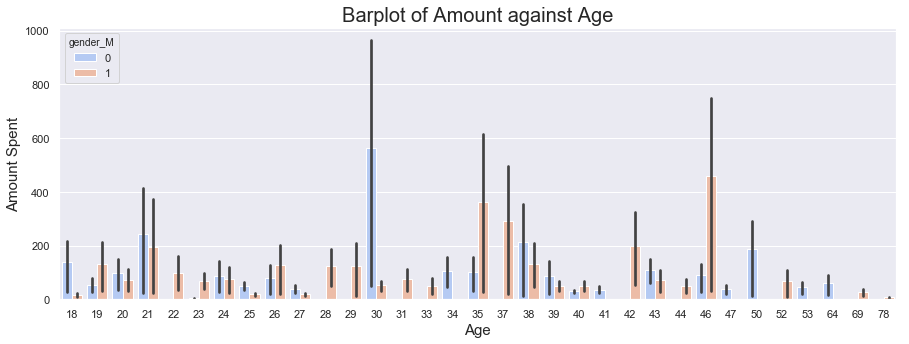

In [25]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
age_amount_with_gender_graph = sns.barplot(x='age', y='amount',hue = 'gender_M', data=customer_df, palette='coolwarm', estimator = np.std)
age_amount_with_gender_graph.axes.set_title("Barplot of Amount against Age",fontsize=20)
age_amount_with_gender_graph.set_xlabel("Age", fontsize=15)
age_amount_with_gender_graph.set_ylabel("Amount Spent", fontsize=15)

Text(0, 0.5, 'Count')

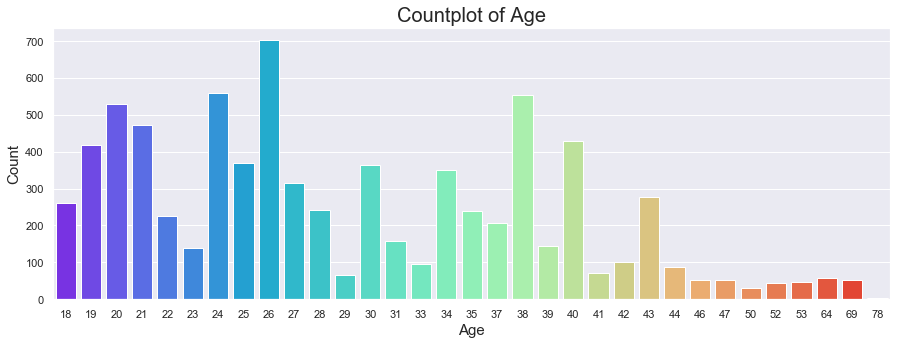

In [26]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
age_countplot = sns.countplot(x = 'age', data = customer_df, palette= 'rainbow')
age_countplot.axes.set_title("Countplot of Age",fontsize=20)
age_countplot.set_xlabel("Age", fontsize=15)
age_countplot.set_ylabel("Count", fontsize=15)

Text(0, 0.5, 'Amount Spent')

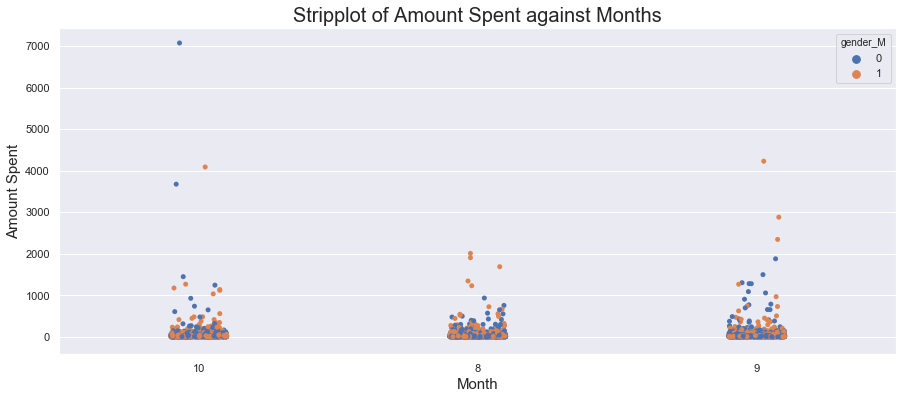

In [27]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
month_amount_with_gender_graph = sns.stripplot(x = 'month', y = 'amount', data = customer_df, hue = 'gender_M', jitter = True)
month_amount_with_gender_graph.axes.set_title("Stripplot of Amount Spent against Months",fontsize=20)
month_amount_with_gender_graph.set_xlabel("Month", fontsize=15)
month_amount_with_gender_graph.set_ylabel("Amount Spent", fontsize=15)

In [28]:
customer_df.corr()

,balance,age,amount,gender_M,txn_description_SALES-POS
balance,1.000000,0.149160,0.030800,0.056767,0.000003
age,0.149160,1.000000,0.026577,-0.007601,-0.003349
amount,0.030800,0.026577,1.000000,0.007138,-0.001660
gender_M,0.056767,-0.007601,0.007138,1.000000,0.014404
txn_description_SALES-POS,0.000003,-0.003349,-0.001660,0.014404,1.000000


Balance and Age are  pretty well correlated.

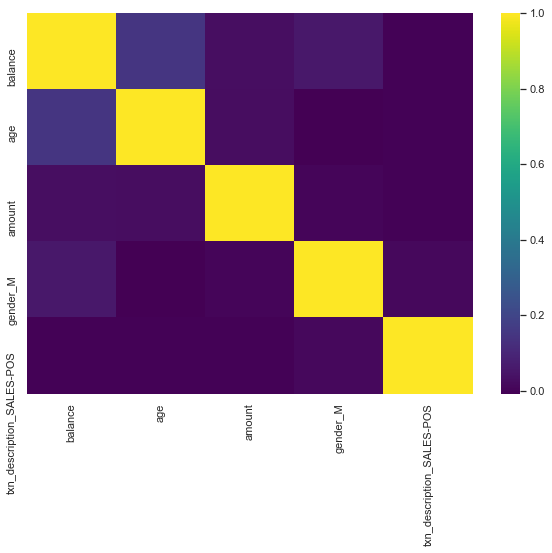

In [29]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(customer_df.corr(), cmap = 'viridis')

Text(0, 0.5, 'Balance')

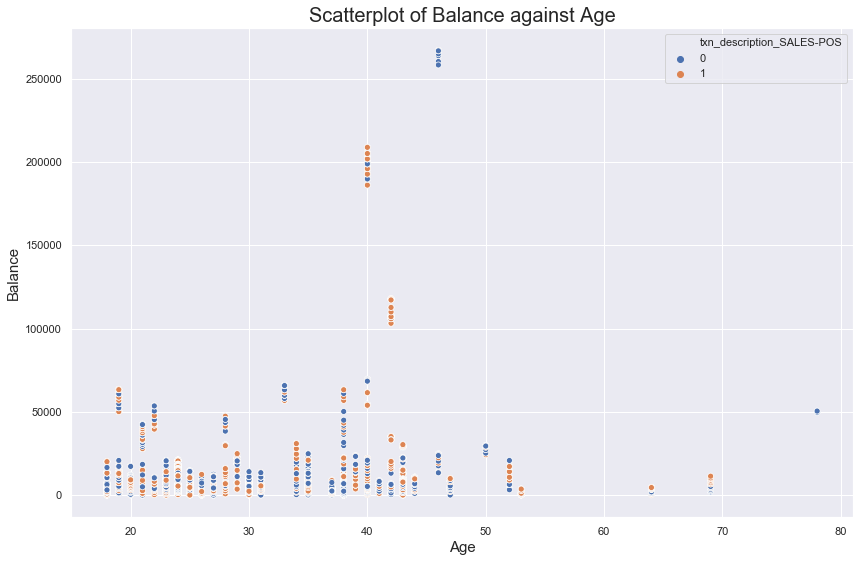

In [30]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(14,9)})
age_balance_with_transac_graph = sns.scatterplot(x = 'age', y = 'balance', data = customer_df, hue='txn_description_SALES-POS', legend="full")
age_balance_with_transac_graph.axes.set_title("Scatterplot of Balance against Age",fontsize=20)
age_balance_with_transac_graph.set_xlabel("Age", fontsize=15)
age_balance_with_transac_graph.set_ylabel("Balance", fontsize=15)

In [31]:
from plotly import __version__
import cufflinks as cf
cf.go_offline()
customer_df.iplot(kind = 'bar', x = 'month', y = 'amount', bins = 40, title='Barplot of Amount Spent against Months', xTitle='Months', yTitle='Amount Spent')